In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

In [4]:
wine_info = load_wine()

In [5]:
wine_info.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
wine_info.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [7]:
X = pd.DataFrame(wine_info.data, columns=wine_info.feature_names)
y = pd.Categorical.from_codes(wine_info.target, wine_info.target_names)

In [8]:
y

['class_0', 'class_0', 'class_0', 'class_0', 'class_0', ..., 'class_2', 'class_2', 'class_2', 'class_2', 'class_2']
Length: 178
Categories (3, object): ['class_0', 'class_1', 'class_2']

In [9]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [10]:
X.shape

(178, 13)

In [12]:
y.shape

(178,)

In [13]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [14]:
wine_info.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [15]:
df = X.join(pd.Series(y, name='class')) 

In [17]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [18]:
y

['class_0', 'class_0', 'class_0', 'class_0', 'class_0', ..., 'class_2', 'class_2', 'class_2', 'class_2', 'class_2']
Length: 178
Categories (3, object): ['class_0', 'class_1', 'class_2']

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
X_lda = lda_model.fit_transform(X, y) 

In [23]:
X_lda

array([[-4.70024401,  1.97913835],
       [-4.30195811,  1.17041286],
       [-3.42071952,  1.42910139],
       [-4.20575366,  4.00287148],
       [-1.50998168,  0.4512239 ],
       [-4.51868934,  3.21313756],
       [-4.52737794,  3.26912179],
       [-4.14834781,  3.10411765],
       [-3.86082876,  1.95338263],
       [-3.36662444,  1.67864327],
       [-4.80587907,  2.23536271],
       [-3.42807646,  2.17510939],
       [-3.66610246,  2.26248961],
       [-5.58824635,  2.05478773],
       [-5.50131449,  3.61304865],
       [-3.18475189,  2.88952528],
       [-3.28936988,  2.76584266],
       [-2.99809262,  1.42511132],
       [-5.24640372,  3.70982655],
       [-3.13653106,  1.97689922],
       [-3.57747791,  0.5624599 ],
       [-1.69077135,  0.91342136],
       [-4.83515033,  0.9147628 ],
       [-3.09588961,  0.61735888],
       [-3.32164716,  0.29847734],
       [-2.14482223,  0.16369247],
       [-3.9824285 ,  2.17515679],
       [-2.68591432,  1.21850924],
       [-3.56309464,

In [22]:
y

['class_0', 'class_0', 'class_0', 'class_0', 'class_0', ..., 'class_2', 'class_2', 'class_2', 'class_2', 'class_2']
Length: 178
Categories (3, object): ['class_0', 'class_1', 'class_2']

In [24]:
model = DecisionTreeClassifier(random_state = 0)

In [25]:
model.fit(X_lda,y)

DecisionTreeClassifier(random_state=0)

In [26]:
model.predict(X_lda)

array(['class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_0',
       'class_0', 'class_0', 'class_0', 'class_0', 'class_0', 'class_1',
       'class_1', 'class_1', 'class_1', 'class_1', 'class_1', 'class_1',
       'class_1', 'class_1', 'class_1', 'class_1', 'class_1', 'class_1',
       'class_1', 'class_1', 'class_1', 'class_1', 'class_1', 'class_1',
       'class_1', 'class_1', 'class_1', 'class_1', 

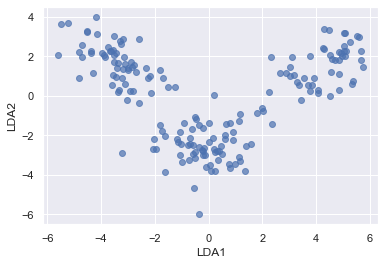

In [26]:
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.scatter(X_lda[:,0],X_lda[:,1],cmap='rainbow',alpha=0.7,edgecolors='b')

In [27]:
y.shape

(178,)

In [ ]:
#pca

In [28]:
from sklearn.decomposition import PCA
pca_class = PCA(n_components=2)
X_pca = pca_class.fit_transform(X, y)

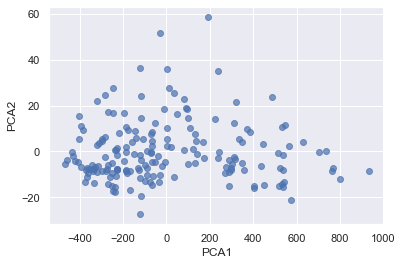

In [29]:
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.scatter(X_pca[:,0],X_pca[:,1],cmap='rainbow',alpha=0.7,edgecolors='b')